In [1]:
import pandas as pd

In [22]:
df

,cbsacode,Year,factor,baseline_moran_value,baseline_moran_p,final_moran_value,final_moran_p,selected_k,SSAMI,ln_pop_beta,ln_pop_p,ln_pop_CI_lower,ln_pop_CI_upper,ln_area_beta,ln_area_p,ln_area_CI_lower,ln_area_CI_upper
0,10740,2011,excessive_drinking,0.298481,0.001,0.026173,0.126,132,-0.313637,1.005161,0.0,0.988715,1.021607,-0.004096,0.813785,-0.038220,0.030028
1,11260,2011,excessive_drinking,0.298481,0.001,0.026173,0.126,132,-0.025590,1.005161,0.0,0.988715,1.021607,-0.004096,0.813785,-0.038220,0.030028
2,12060,2011,excessive_drinking,0.298481,0.001,0.026173,0.126,132,-0.057418,1.005161,0.0,0.988715,1.021607,-0.004096,0.813785,-0.038220,0.030028
3,12260,2011,excessive_drinking,0.298481,0.001,0.026173,0.126,132,-0.041601,1.005161,0.0,0.988715,1.021607,-0.004096,0.813785,-0.038220,0.030028
4,12420,2011,excessive_drinking,0.298481,0.001,0.026173,0.126,132,0.254033,1.005161,0.0,0.988715,1.021607,-0.004096,0.813785,-0.038220,0.030028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17275,45820,2022,DEP,0.289262,0.001,0.018403,0.194,72,-0.006041,0.933195,0.0,0.923049,0.943340,-0.032342,0.003506,-0.054023,-0.010662
17276,46140,2022,DEP,0.289262,0.001,0.018403,0.194,72,0.371638,0.933195,0.0,0.923049,0.943340,-0.032342,0.003506,-0.054023,-0.010662
17277,47260,2022,DEP,0.289262,0.001,0.018403,0.194,72,0.113171,0.933195,0.0,0.923049,0.943340,-0.032342,0.003506,-0.054023,-0.010662
17278,48620,2022,DEP,0.289262,0.001,0.018403,0.194,72,0.000698,0.933195,0.0,0.923049,0.943340,-0.032342,0.003506,-0.054023,-0.010662


In [9]:
df = pd.read_csv('../00_data/03_analysis_data/sasami_result_0403.csv')
df.loc[df['factor'] == 'Park_Area_Acres', 'factor'] = 'PARK'
df.loc[df['factor'] == 'noise90n', 'factor'] = 'NOI'
df.loc[df['factor'] == 'no_time_activity', 'factor'] = 'PI'
df.loc[df['factor'] == 'smo_obe_dia', 'factor'] = 'UNH'
df.loc[df['factor'] == 'depressed', 'factor'] = 'DEP'
df.loc[df['factor'] == 'gdp', 'factor'] = 'GDP'
df.loc[df['factor'] == 'mental_health_providers', 'factor'] = 'MHP'

In [10]:
my_factors = ['GDP','NOI','PARK','PI','UNH','DEP','MHP']

In [ ]:
df_select = df.loc[df['factor'].isin(my_factors)]
sami_col = df_select.columns[df_select.columns.str.contains("SAMI", case=False)][0]

dfp = df_select.pivot(index=["cbsacode",'Year'], columns="factor", values=sami_col).reset_index()
df_cleaned = dfp.drop(columns=["cbsacode",'Year'])  # Reverse column order as in original code

In [25]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


df_vif = add_constant(df_cleaned) # Add a constant term
vif_data = pd.DataFrame()
vif_data["feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))

  feature       VIF
1     DEP  1.232106
6      PI  1.173449
3     MHP  1.166738
2     GDP  1.139832
7     UNH  1.088947
4     NOI  1.059822
5    PARK  1.046425
0   const  1.000000


In [23]:
df_cleaned

factor,DEP,GDP,MHP,NOI,PARK,PI,UNH
0,0.106620,-0.239079,-1.344524,-0.353252,-0.548372,-0.065398,-35.709701
1,0.088413,-0.244747,-1.358889,-0.353252,-0.546069,-0.068621,-35.707513
2,0.030748,-0.302426,-0.468310,-0.412407,-0.559968,-0.110800,-61.111373
3,0.160879,-0.281242,0.735976,-0.416739,-0.546868,-0.113100,-62.975746
4,0.065120,-0.262704,0.729018,-0.418289,-0.529224,-0.125239,-63.636467
...,...,...,...,...,...,...,...
859,-0.059903,-0.137262,-0.114545,-0.243331,0.574433,0.014540,-140.618752
860,-0.023582,-0.130752,-0.123759,-0.253445,0.575201,-0.010911,-144.964352
861,-0.136951,-0.125717,-0.132094,-0.260714,0.575945,0.051107,-148.099764
862,-0.098122,-0.083017,-0.152450,-0.260381,0.577888,0.033681,-147.930573


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# Example: your dataframe (replace this with your real df_cleaned)
# df_cleaned = pd.read_csv('your_file.csv')  # if loading from file
# Ensure numeric types
df_cleaned = df_cleaned.astype(float)

# Perform pairwise KS tests
ks_results = {}
columns = df_cleaned.columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        col1, col2 = columns[i], columns[j]
        ks_stat, p_value = ks_2samp(df_cleaned[col1], df_cleaned[col2])
        ks_results[(col1, col2)] = {
            'KS Statistic': ks_stat,
            'p-value': p_value
        }

# Convert KS results to a DataFrame for display
ks_df = pd.DataFrame.from_dict(ks_results, orient='index')
print("Kolmogorov–Smirnov Test Results:\n")
print(ks_df)


Kolmogorov–Smirnov Test Results:

           KS Statistic        p-value
DEP  GDP       0.121528   5.607365e-06
     MHP       0.281250   1.711449e-30
     NOI       0.461806   1.624744e-83
     PARK      0.405093   9.102371e-64
     PI        0.072917   2.020109e-02
     UNH       0.621528  1.931090e-156
GDP  MHP       0.228009   4.289553e-20
     NOI       0.420139   1.018480e-68
     PARK      0.406250   3.850715e-64
     PI        0.113426   2.923687e-05
     UNH       0.621528  1.931090e-156
MHP  NOI       0.289352   2.820161e-32
     PARK      0.230324   1.687929e-20
     PI        0.234954   2.538065e-21
     UNH       0.621528  1.931090e-156
NOI  PARK      0.202546   6.445728e-16
     PI        0.471065   5.018082e-87
     UNH       0.620370  8.248343e-156
PARK PI        0.402778   5.044023e-63
     UNH       0.620370  8.248343e-156
PI   UNH       0.621528  1.931090e-156


<Axes: xlabel='UNH', ylabel='Density'>

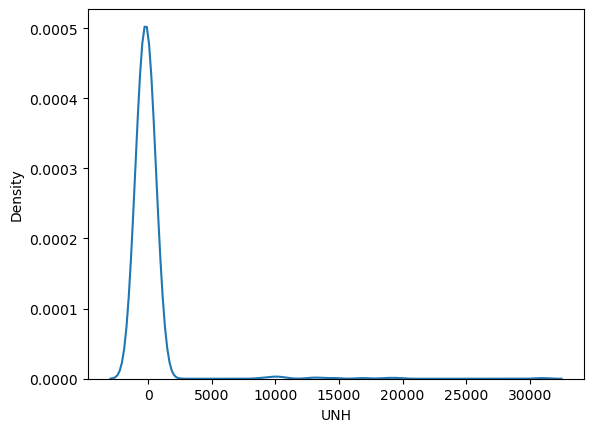

In [21]:
sns.kdeplot(df_cleaned['UNH'], label='UNH')

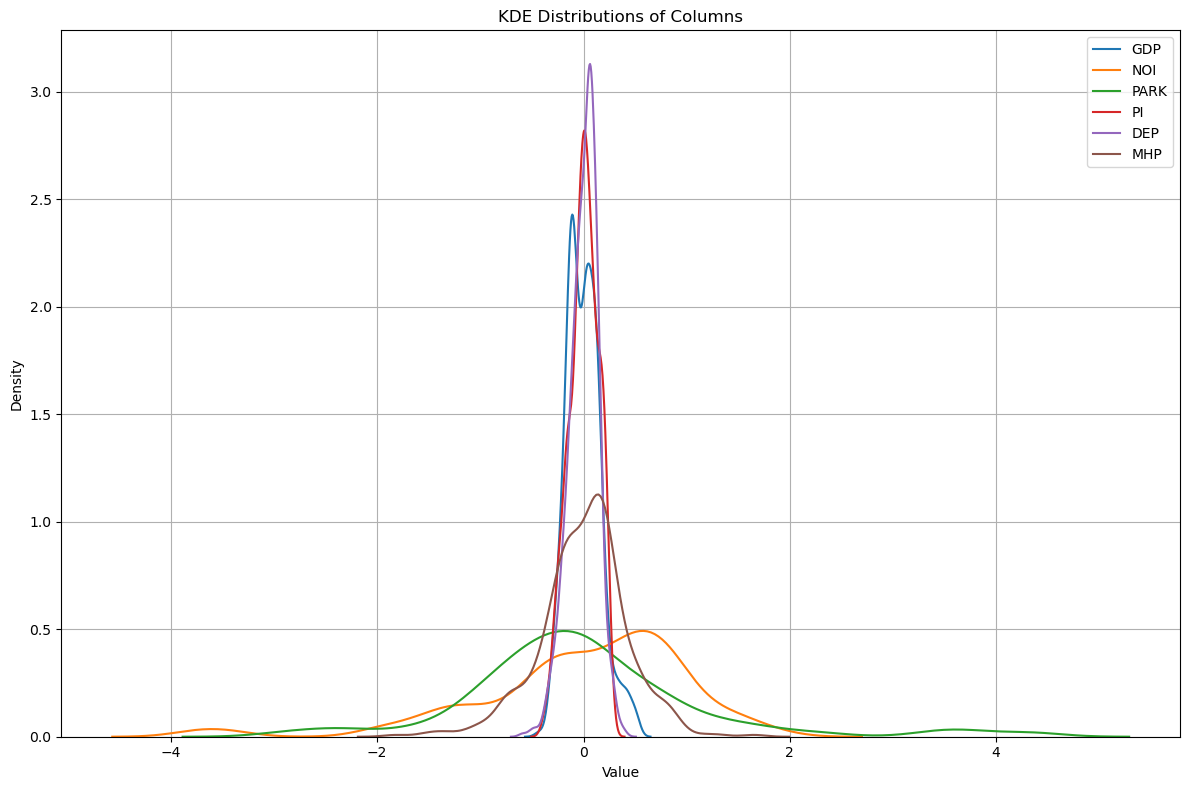

In [15]:
# Plot KDE distributions
plt.figure(figsize=(12, 8))
for col in  ['GDP','NOI','PARK','PI','DEP','MHP']:
    sns.kdeplot(df_cleaned[col], label=col)

plt.title("KDE Distributions of Columns")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
df_standardized = (df_cleaned - df_cleaned.mean()) / df_cleaned.std()

In [17]:
# Repeat KS test on transformed df
for i in range(len(df_standardized.columns)):
    for j in range(i + 1, len(df_standardized.columns)):
        ks_stat, p_val = ks_2samp(df_standardized.iloc[:, i], df_standardized.iloc[:, j])
        print(f"{df_standardized.columns[i]} vs {df_standardized.columns[j]}: KS={ks_stat:.3f}, p={p_val:.3e}")

DEP vs GDP: KS=0.097, p=5.633e-04
DEP vs MHP: KS=0.074, p=1.744e-02
DEP vs NOI: KS=0.069, p=3.098e-02
DEP vs PARK: KS=0.188, p=1.093e-13
DEP vs PI: KS=0.068, p=3.556e-02
DEP vs UNH: KS=0.363, p=4.158e-51
GDP vs MHP: KS=0.111, p=4.589e-05
GDP vs NOI: KS=0.161, p=3.569e-10
GDP vs PARK: KS=0.125, p=2.668e-06
GDP vs PI: KS=0.095, p=8.280e-04
GDP vs UNH: KS=0.292, p=8.530e-33
MHP vs NOI: KS=0.087, p=2.963e-03
MHP vs PARK: KS=0.162, p=2.577e-10
MHP vs PI: KS=0.082, p=5.831e-03
MHP vs UNH: KS=0.309, p=7.865e-37
NOI vs PARK: KS=0.214, p=9.417e-18
NOI vs PI: KS=0.104, p=1.677e-04
NOI vs UNH: KS=0.370, p=4.117e-53
PARK vs PI: KS=0.146, p=1.982e-08
PARK vs UNH: KS=0.208, p=8.030e-17
PI vs UNH: KS=0.315, p=3.127e-38


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_minmax = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

In [20]:
# Repeat KS test on transformed df
for i in range(len(df_minmax.columns)):
    for j in range(i + 1, len(df_minmax.columns)):
        ks_stat, p_val = ks_2samp(df_minmax.iloc[:, i], df_minmax.iloc[:, j])
        print(f"{df_minmax.columns[i]} vs {df_minmax.columns[j]}: KS={ks_stat:.3f}, p={p_val:.3e}")

DEP vs GDP: KS=0.404, p=2.146e-63
DEP vs MHP: KS=0.336, p=1.666e-43
DEP vs NOI: KS=0.285, p=2.990e-31
DEP vs PARK: KS=0.613, p=4.630e-152
DEP vs PI: KS=0.141, p=6.292e-08
DEP vs UNH: KS=0.984, p=0.000e+00
GDP vs MHP: KS=0.309, p=7.865e-37
GDP vs NOI: KS=0.553, p=6.449e-122
GDP vs PARK: KS=0.240, p=3.670e-22
GDP vs PI: KS=0.310, p=4.148e-37
GDP vs UNH: KS=0.984, p=0.000e+00
MHP vs NOI: KS=0.514, p=2.375e-104
MHP vs PARK: KS=0.534, p=6.245e-113
MHP vs PI: KS=0.274, p=5.238e-29
MHP vs UNH: KS=0.984, p=0.000e+00
NOI vs PARK: KS=0.697, p=3.923e-201
NOI vs PI: KS=0.255, p=5.213e-25
NOI vs UNH: KS=0.958, p=0.000e+00
PARK vs PI: KS=0.525, p=2.382e-109
PARK vs UNH: KS=0.963, p=0.000e+00
PI vs UNH: KS=0.977, p=0.000e+00
